In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
datos_url= "C://Users/maxib/Source/repos/proyecto_final_coder/datos/Base_predictive_maintenance.csv"

In [12]:
# Leer .csv y creo un DF
df = pd.read_csv(datos_url, delimiter=",", index_col= ["UDI", "Product_ID"])
df.head()

Type  Air_temperature_[K]  Process_temperature_[K]  \
UDI Product_ID                                                      
1   M14860        M                298.1                    308.6   
2   L47181        L                298.2                    308.7   
3   L47182        L                298.1                    308.5   
4   L47183        L                298.2                    308.6   
5   L47184        L                298.2                    308.7   

                Rotational_speed_[rpm]  Torque_[Nm]  Tool_wear_[min]  Target  \
UDI Product_ID                                                                 
1   M14860                        1551         42.8                0       0   
2   L47181                        1408         46.3                3       0   
3   L47182                        1498         49.4                5       0   
4   L47183                        1433         39.5                7       0   
5   L47184                        1408         40.0                9       0   

               Failure_Type  
UDI Product_ID               
1   M14860       No Failure  
2   L47181       No Failure  
3   L47182       No Failure  
4   L47183       No Failure  
5   L47184       No Failure

# General

In [6]:
# Datos del Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (1, 'M14860') to (10000, 'M24859')
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air_temperature_[K]      10000 non-null  float64
 2   Process_temperature_[K]  10000 non-null  float64
 3   Rotational_speed_[rpm]   10000 non-null  int64  
 4   Torque_[Nm]              10000 non-null  float64
 5   Tool_wear_[min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure_Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ MB


In [8]:
# Filtramos variables para centrarnos en los momentos de falla 
fallas= df[df['Failure_Type']!="No Failure"]
# Filtramos momentos sin fallas
sin_fallas= df[df['Failure_Type']=="No Failure"]

(10000, 8)

<Figure size 720x480 with 0 Axes>

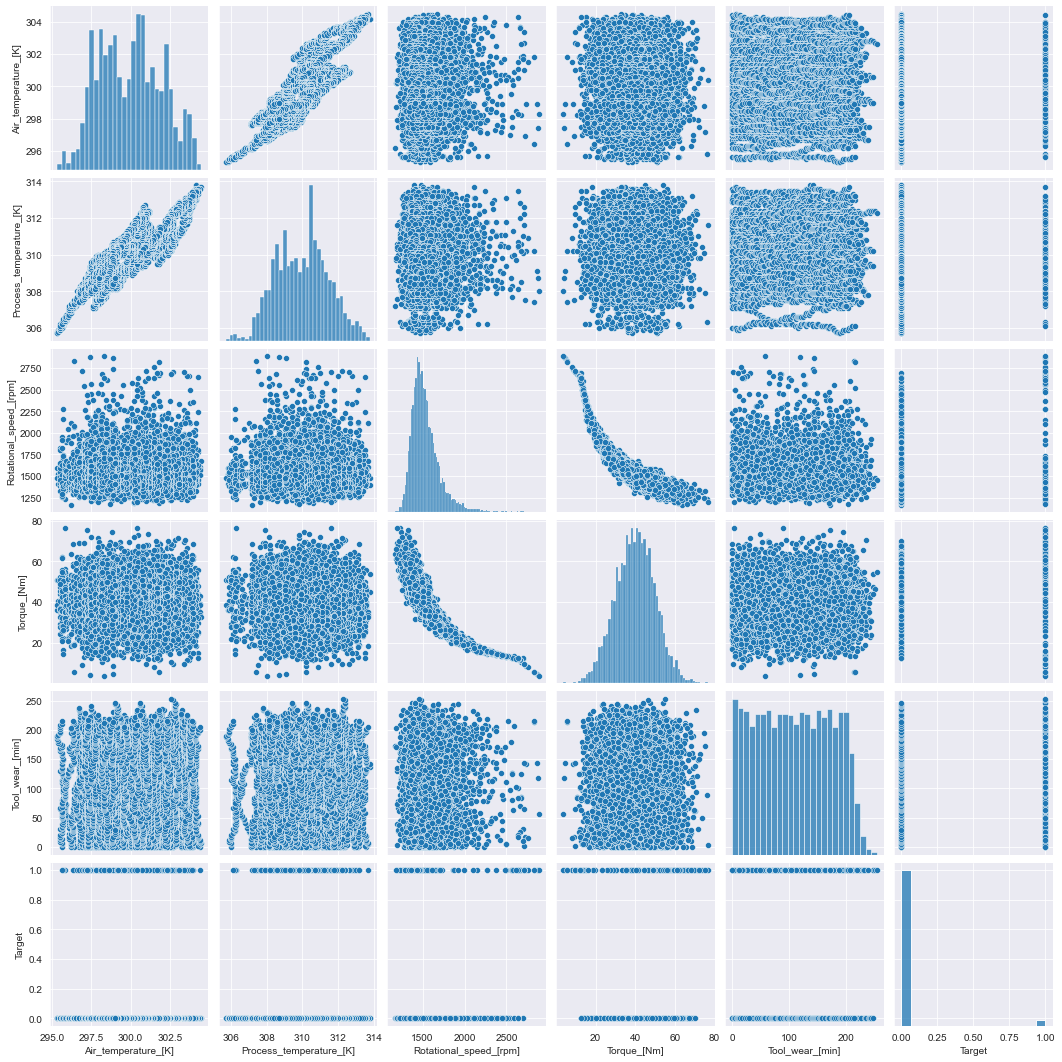

In [9]:
# Pairplot data set
plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

# Segmentación según Target

<Figure size 720x480 with 0 Axes>

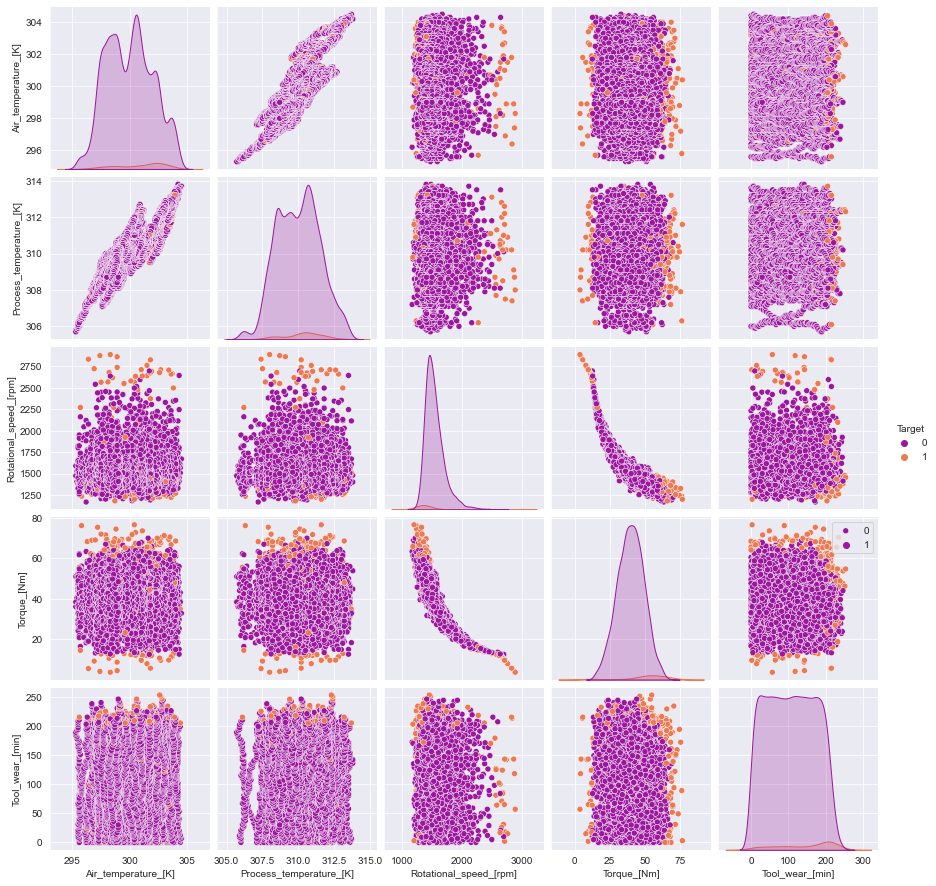

In [13]:
# Crear el Pairplot pero ahora con el atributo hue= TARGET
legenda= df["Target"].unique()
plt.figure(dpi=120)
sns.pairplot(df, hue="Target", palette= "plasma")
plt.legend(legenda)
plt.show()

Insight: Podemos notar que los valores de falla se encuentran representados en los valores ubicados en los extremos.

# Segmentación según Failure_Type

<Figure size 720x480 with 0 Axes>

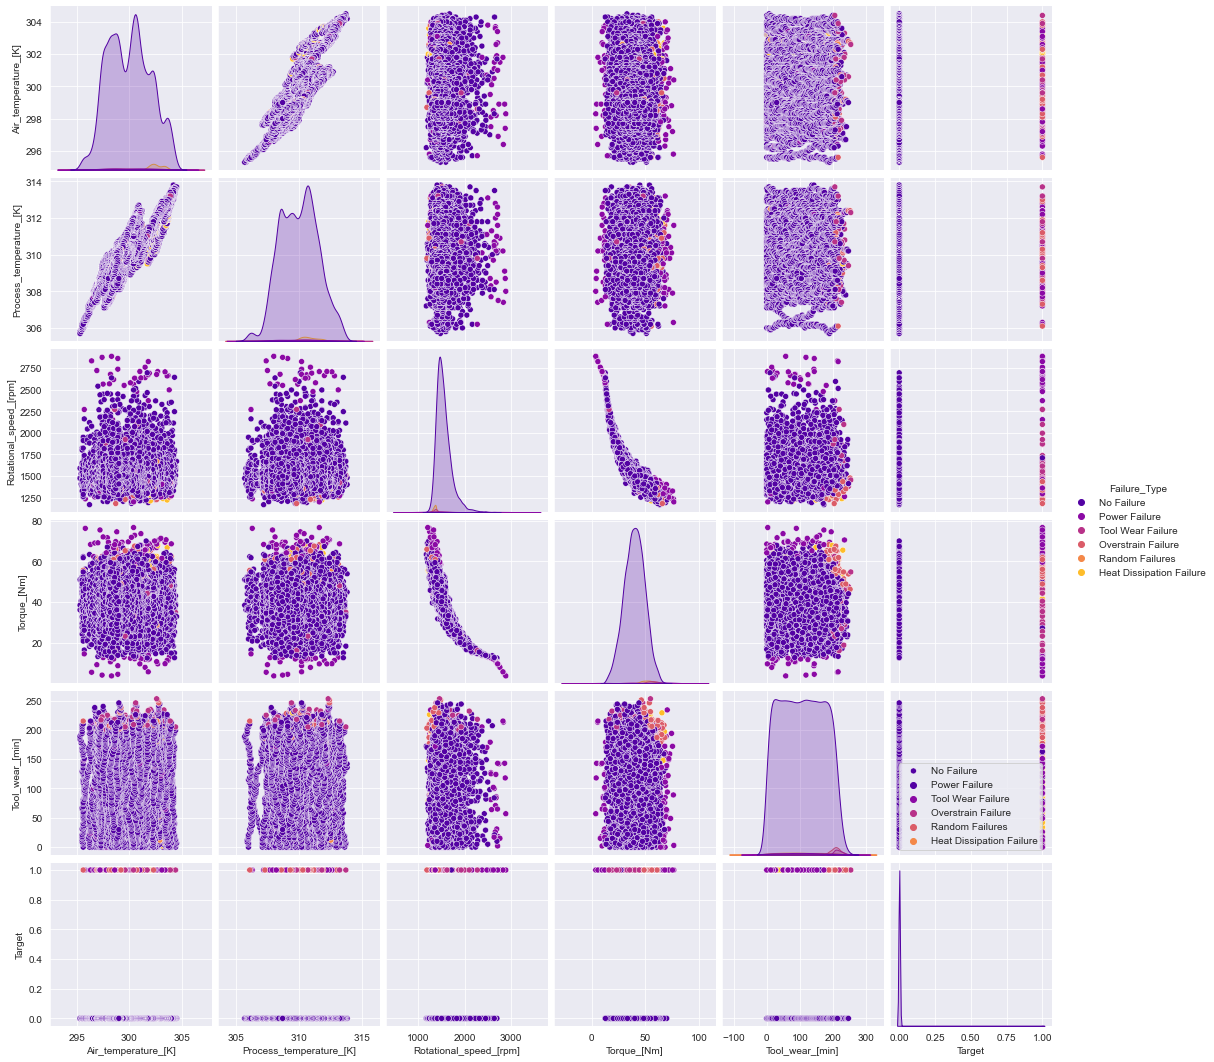

In [12]:
#Crear el Pairplot pero ahora con el atributo hue= failure_type(tiene un gran desbalance)
legenda= df["Failure_Type"].unique()
plt.figure(dpi=120)
sns.pairplot(df, hue="Failure_Type", palette= "plasma")
plt.legend(legenda)
plt.show()

## Segmentación según Failure_Type, Momentos de No Falla

<Figure size 720x480 with 0 Axes>

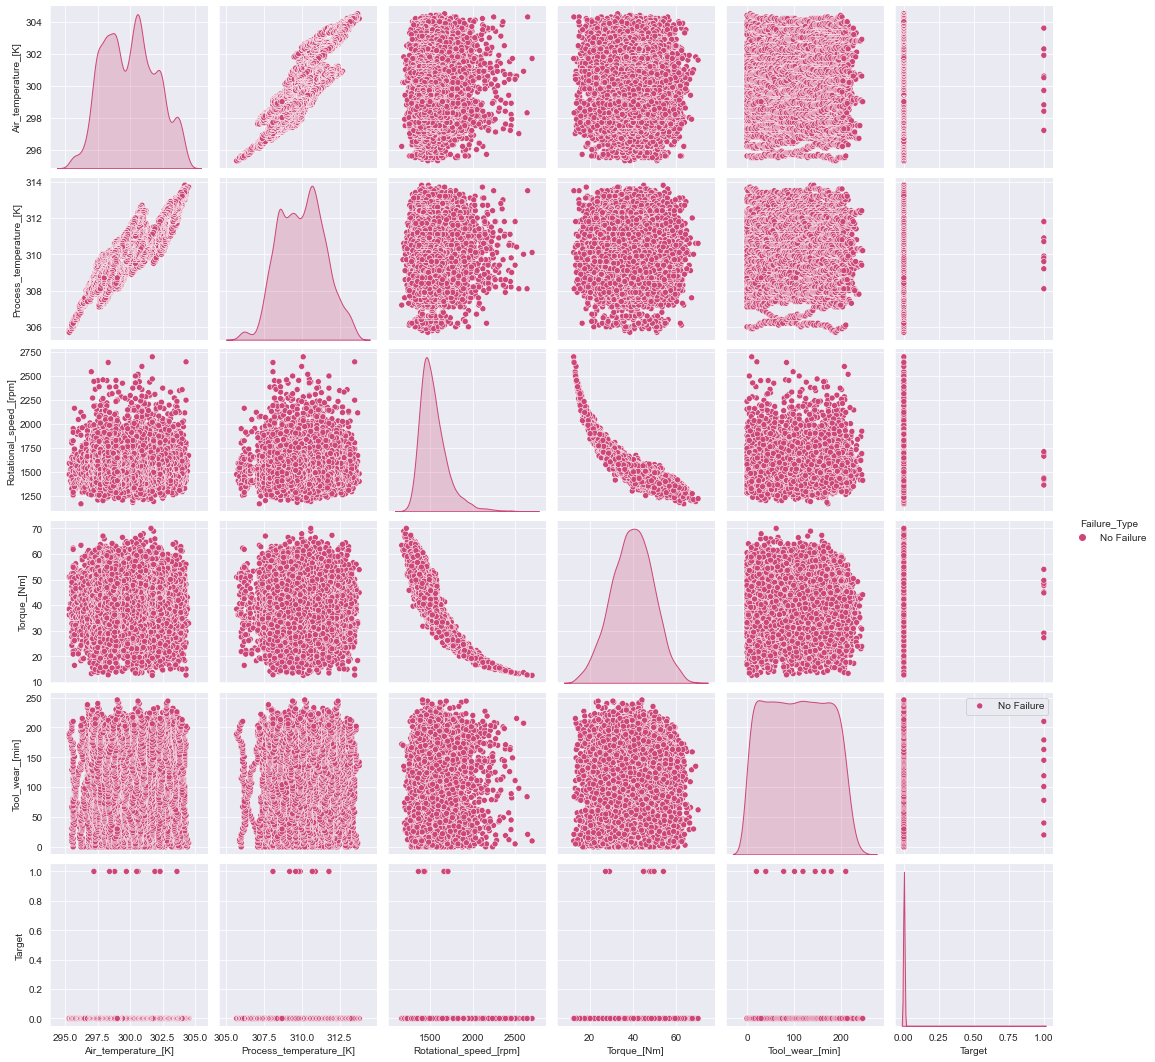

In [15]:
# Crear el Pairplot pero ahora con el atributo hue= failure_type(elimino momentos de falla para ver valores normales).
legenda= sin_fallas["Failure_Type"].unique()
plt.figure(dpi=120)
sns.pairplot(sin_fallas, hue="Failure_Type", palette= "plasma")
plt.legend(legenda)
plt.show()

## Segmentación según Failure_Type, Momentos de Falla

<Figure size 720x480 with 0 Axes>

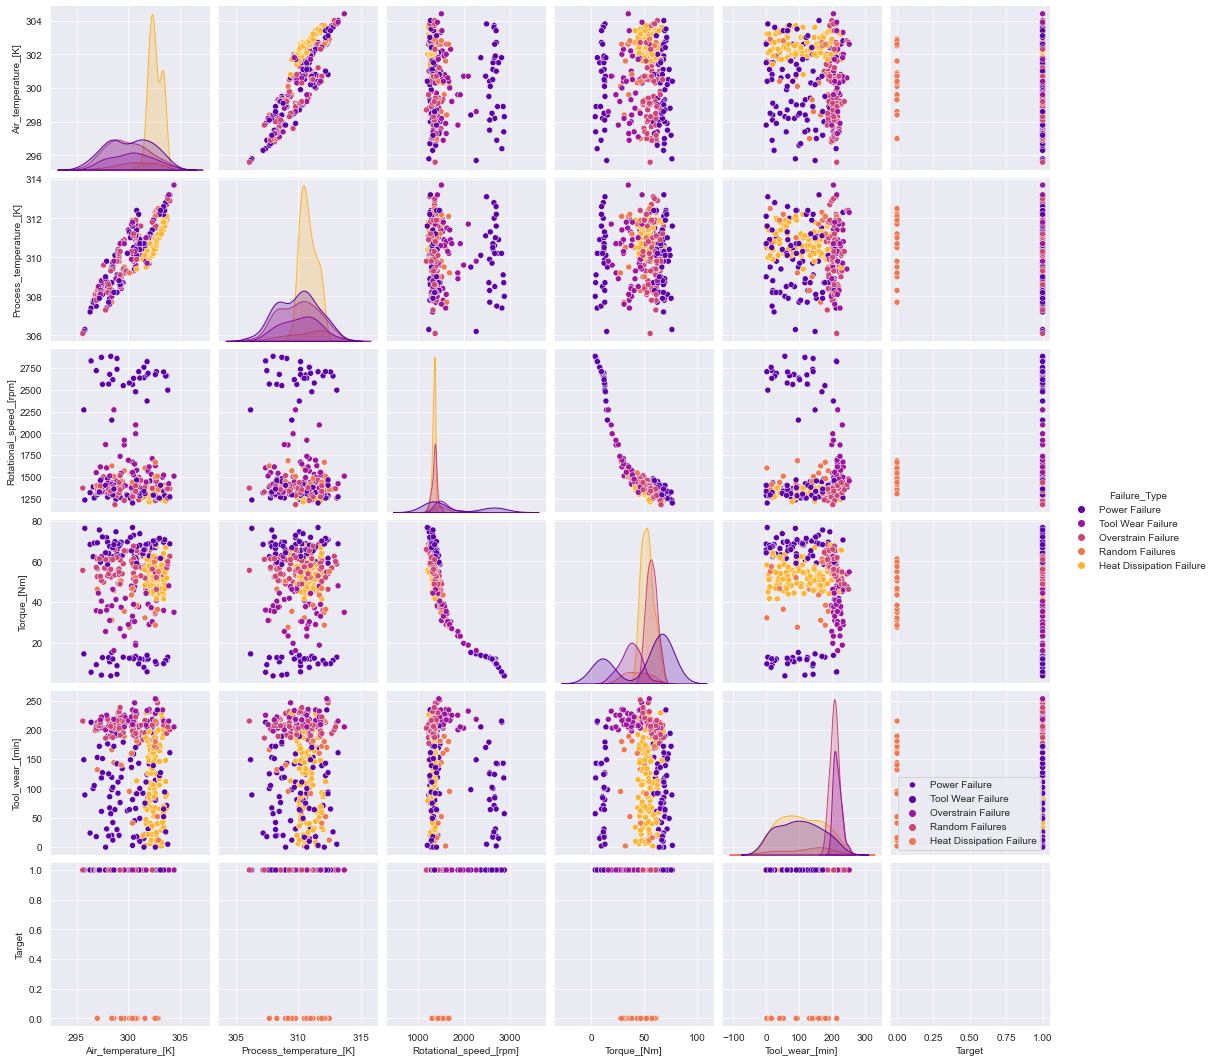

In [14]:
# Crear el Pairplot pero ahora con el atributo hue= failure_type(elimino momentos de no_failure).
legenda= fallas["Failure_Type"].unique()
plt.figure(dpi=120)
sns.pairplot(fallas, hue="Failure_Type", palette= "plasma")
plt.legend(legenda)
plt.show()

# Correlación

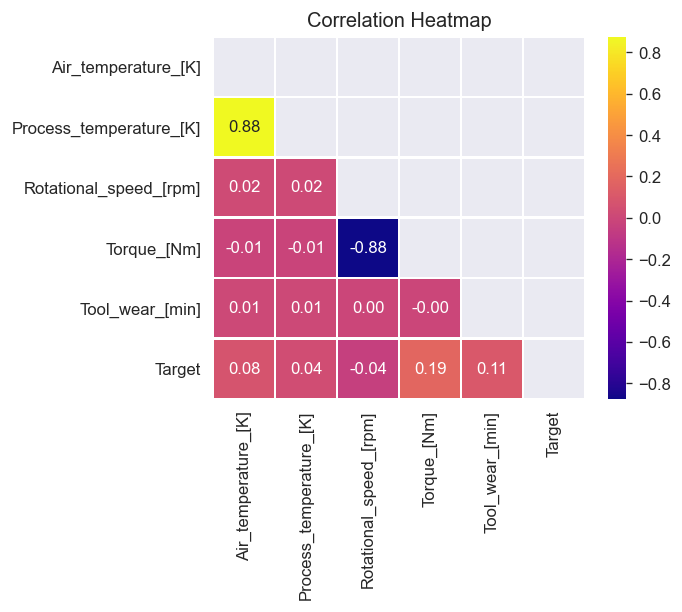

In [17]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mascara = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mascara, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Insight: Existen 2 pares de variables con una correlacion lineal marcada, una de forma positiva y otra negativa, el primer par es el de las variables que representan las temperaturas, es logico que cuando la temperatura del proceso de produccion aumente, la temperatura del air aumente. 
Mientras que el otro par es la variable Torque y la variable Rotational_speed, esta relacion negativa se debe a la dificultad de mantener altos valores de torque a velocidades altas de rotación.

Joint plot de Rotational_speed_[rpm] con otras variables ==> 

Correlacion entre Rotational_speed_[rpm] y Air_temperature_[K] ==>  0.022670458795547032


<Figure size 500x400 with 0 Axes>

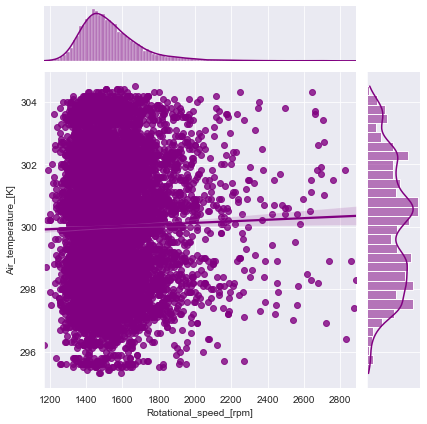

Correlacion entre Rotational_speed_[rpm] y Process_temperature_[K] ==>  0.019276713901805416


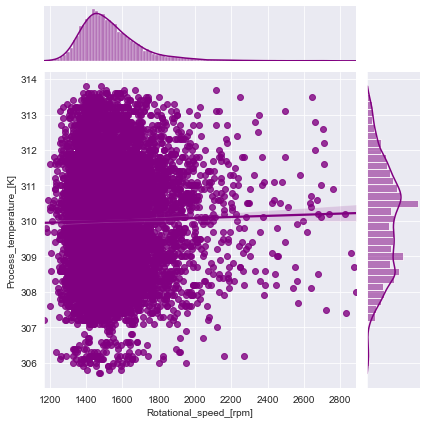

Correlacion entre Rotational_speed_[rpm] y Torque_[Nm] ==>  -0.8750270862996068


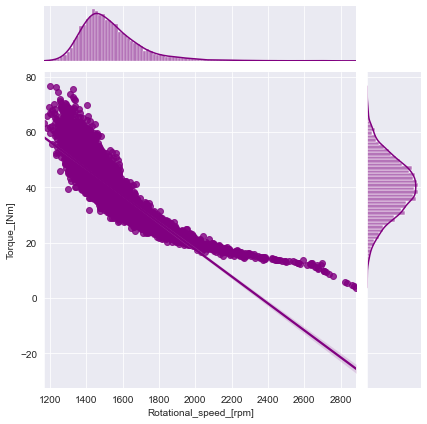

Correlacion entre Rotational_speed_[rpm] y Tool_wear_[min] ==>  0.00022308484018731056


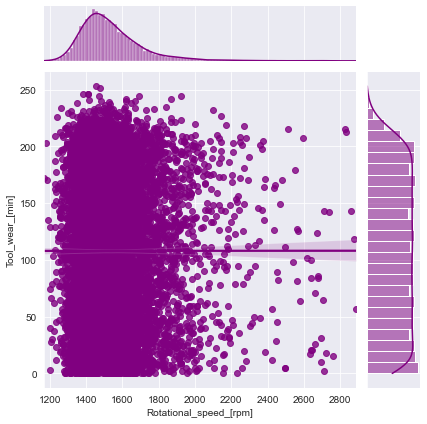

Correlacion entre Rotational_speed_[rpm] y Target ==>  -0.04418755973437811


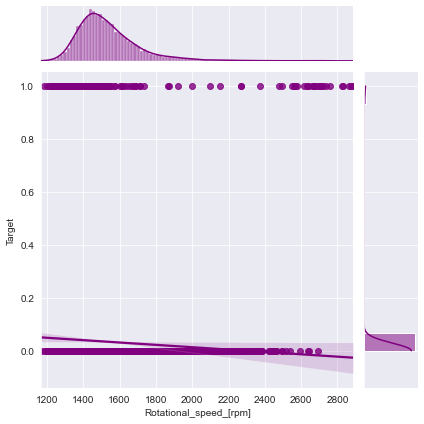

In [23]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de Rotational_speed_[rpm] con otras variables ==> \n")
for columna in  df.columns:
    if columna != "Rotational_speed_[rpm]" and columna != "Type" and columna != "Failure_Type":
        print(f"Correlacion entre Rotational_speed_[rpm] y {columna} ==> ",df.corr().loc["Rotational_speed_[rpm]"][columna])
        sns.jointplot(x="Rotational_speed_[rpm]",y=columna,data=df,kind = 'reg',color = 'purple')
        plt.show()

Insight: Se puede observar una relacion lineal negativa importante entre la variable Torque_[Nm] y la variable Rotational_speed_[rpm], mientras que existe una pequeña relacion lineal positiva entre Process_temperature_[K] y Rotational_speed_[rpm], lo mismo entre Air_temperature_[K] y Rotational_speed_[rpm].

Joint plot de Air_temperature_[K] con otras variables ==> 

Correlacion entre Air_temperature_[K] y Process_temperature_[K] ==>  0.8761071581166469


<Figure size 500x400 with 0 Axes>

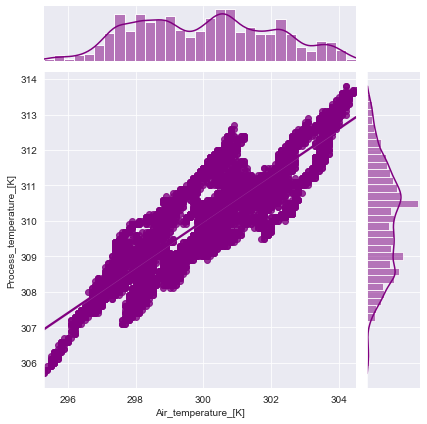

Correlacion entre Air_temperature_[K] y Rotational_speed_[rpm] ==>  0.022670458795547032


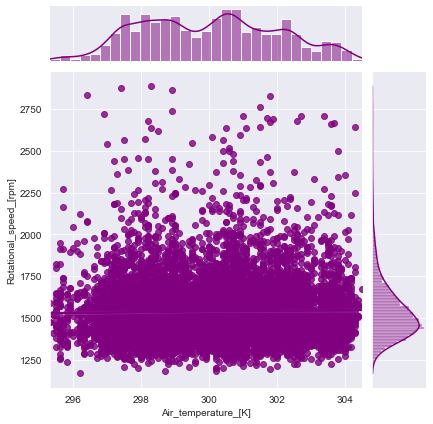

Correlacion entre Air_temperature_[K] y Torque_[Nm] ==>  -0.013777823050938618


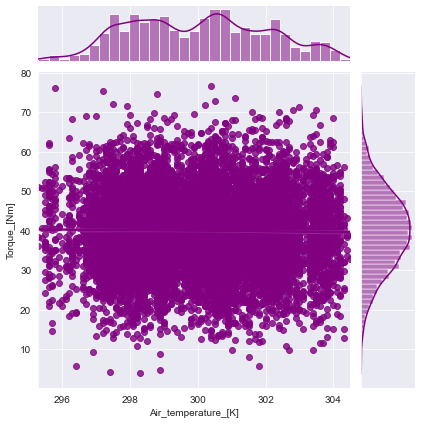

Correlacion entre Air_temperature_[K] y Tool_wear_[min] ==>  0.013852827663167115


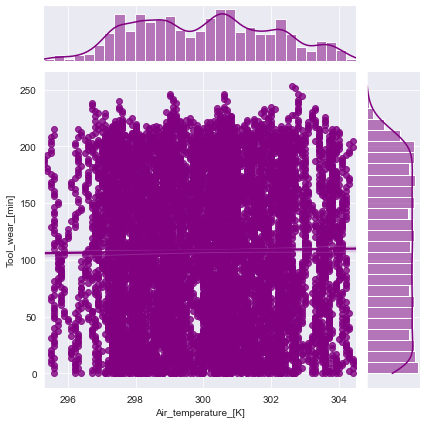

Correlacion entre Air_temperature_[K] y Target ==>  0.08255568978324358


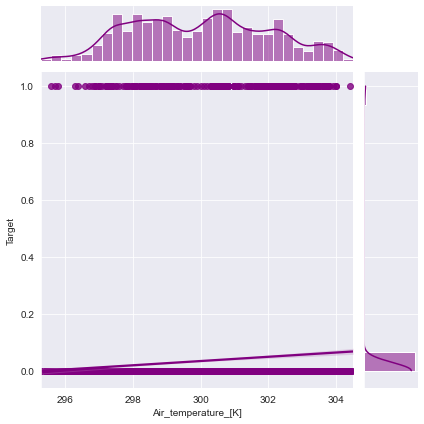

In [24]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de Air_temperature_[K] con otras variables ==> \n")
for columna in  df.columns:
    if columna != "Air_temperature_[K]" and columna != "Type" and columna != "Failure_Type":
        print(f"Correlacion entre Air_temperature_[K] y {columna} ==> ",df.corr().loc["Air_temperature_[K]"][columna])
        sns.jointplot(x="Air_temperature_[K]",y=columna,data=df,kind = 'reg',color = 'purple')
        plt.show()

Marcada releacion lineal positiva entre la variable Air_temperature_[K] y la variable Process_temperature_[K]. 